# 3. Results Analysis

### 0. Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 1. Training Results Analysis
- Look at training results for all features and model type experiments

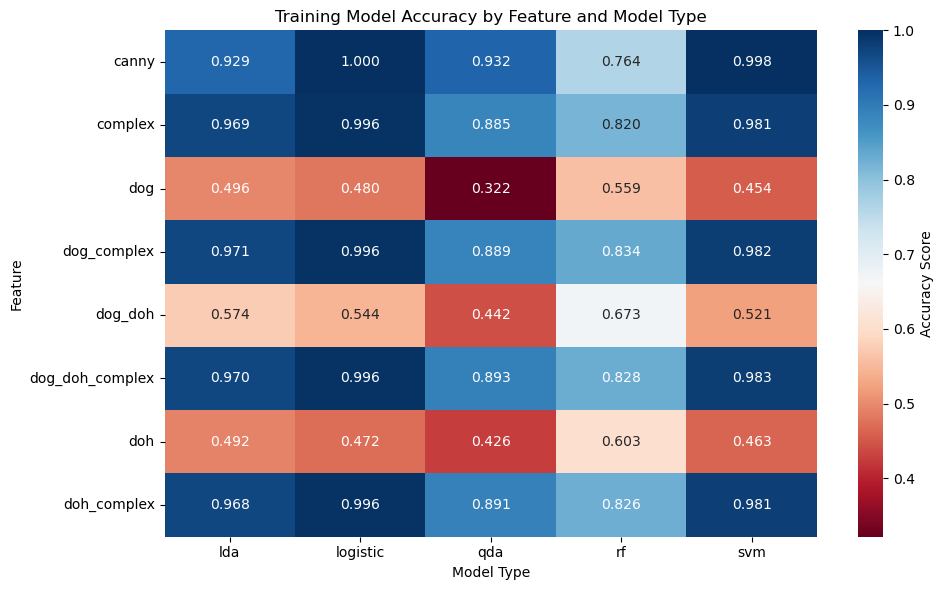

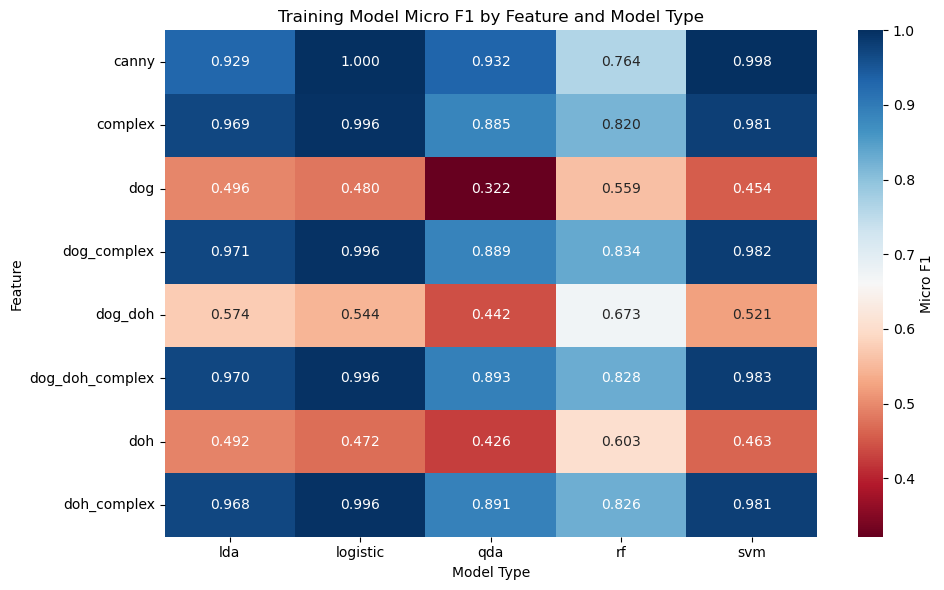

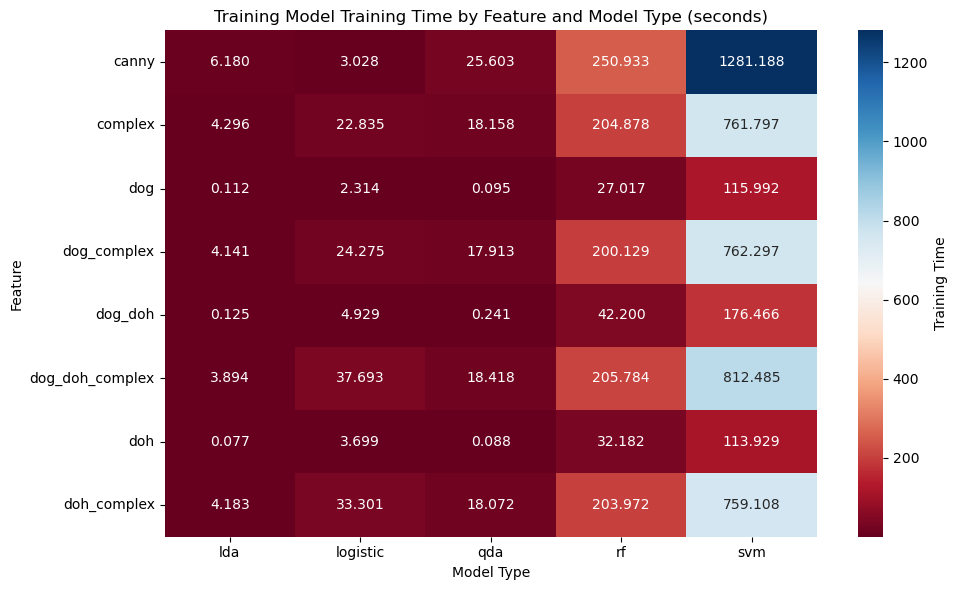

In [4]:
training_results = pd.read_csv('results/training_results.csv')
# Pivot the table to get features as rows, model types as columns, and accuracy as values
pivot_df_accuracy = training_results.pivot(index='feature', columns='model_type', values='accuracy_score')
pivot_df_micro_f1 = training_results.pivot(index='feature', columns='model_type', values ='micro_f1')
pivot_df_training_time = training_results.pivot(index='feature', columns='model_type', values = 'training_time')
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df_accuracy, annot=True, fmt=".3f", cmap='RdBu', cbar_kws={'label': 'Accuracy Score'})

plt.title('Training Model Accuracy by Feature and Model Type')
plt.xlabel('Model Type')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df_micro_f1, annot=True, fmt=".3f", cmap='RdBu', cbar_kws={'label': 'Micro F1'})

plt.title('Training Model Micro F1 by Feature and Model Type')
plt.xlabel('Model Type')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df_training_time, annot=True, fmt=".3f", cmap='RdBu', cbar_kws={'label': 'Training Time'})

plt.title('Training Model Training Time by Feature and Model Type (seconds)')
plt.xlabel('Model Type')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### 2. Testing Results Analysis
- Look at testing results for all model type experiments

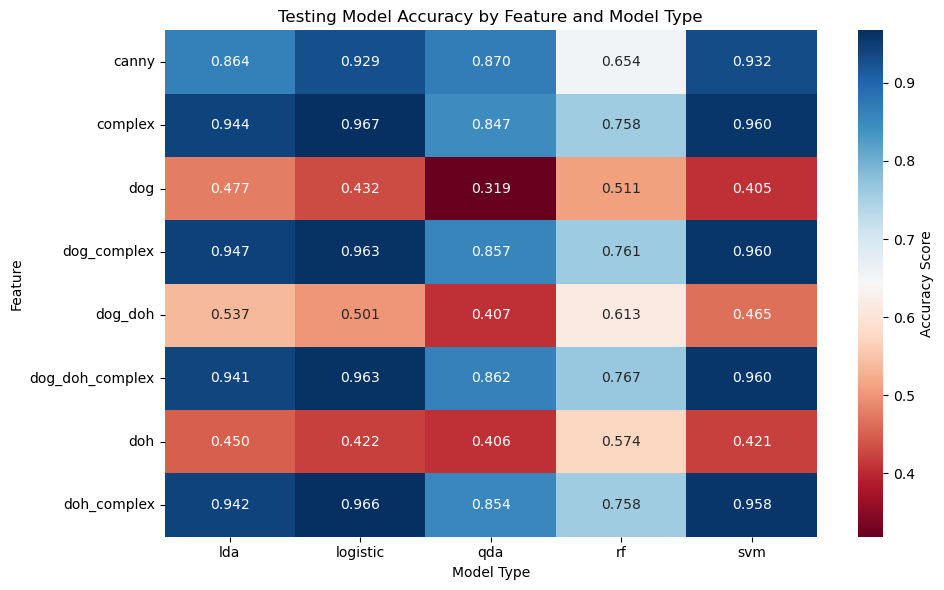

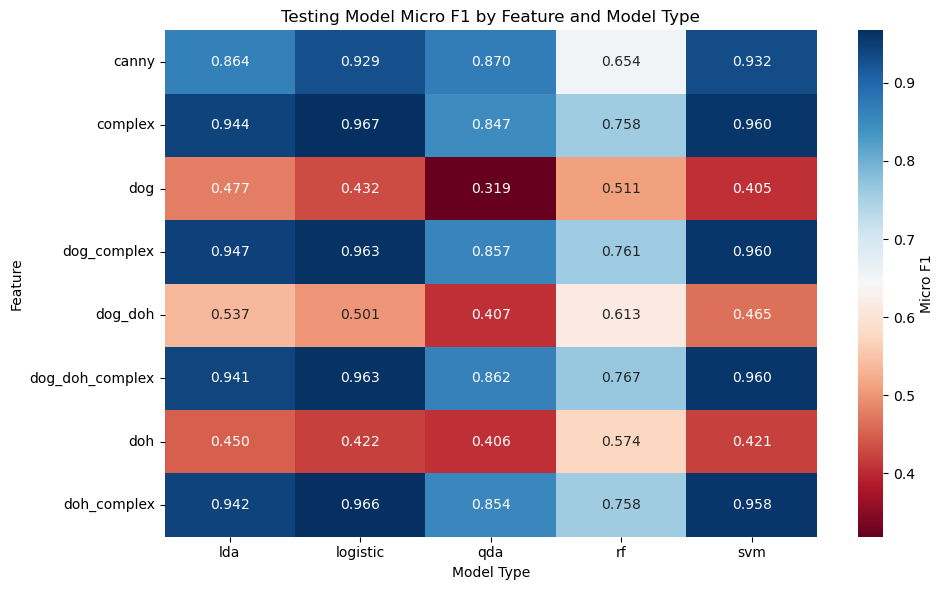

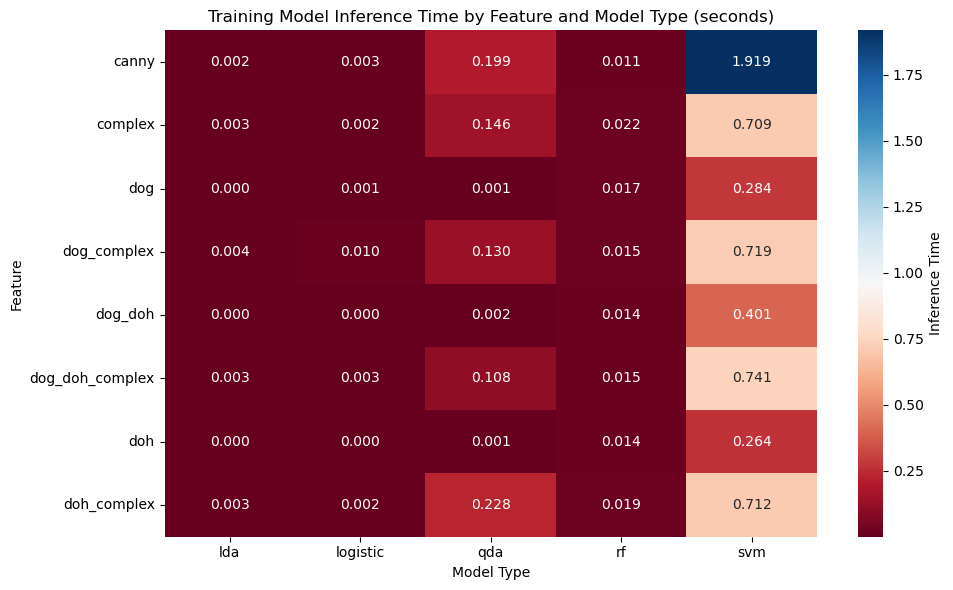

In [5]:
testing_results = pd.read_csv('results/test_results.csv')
# Pivot the table to get features as rows, model types as columns, and accuracy as values
pivot_df_accuracy = testing_results.pivot(index='feature', columns='model_type', values='accuracy_score')
pivot_df_micro_f1 = testing_results.pivot(index='feature', columns='model_type', values ='micro_f1')
pivot_df_inference_time = testing_results.pivot(index='feature', columns='model_type', values ='inference_time')


# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df_accuracy, annot=True, fmt=".3f", cmap='RdBu', cbar_kws={'label': 'Accuracy Score'})

plt.title('Testing Model Accuracy by Feature and Model Type')
plt.xlabel('Model Type')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df_micro_f1, annot=True, fmt=".3f", cmap='RdBu', cbar_kws={'label': 'Micro F1'})

plt.title('Testing Model Micro F1 by Feature and Model Type')
plt.xlabel('Model Type')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df_inference_time, annot=True, fmt=".3f", cmap='RdBu', cbar_kws={'label': 'Inference Time'})

plt.title('Training Model Inference Time by Feature and Model Type (seconds)')
plt.xlabel('Model Type')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### 3. Group By Model Type Summary

Text(0, 0.5, 'Mean Accuracy')

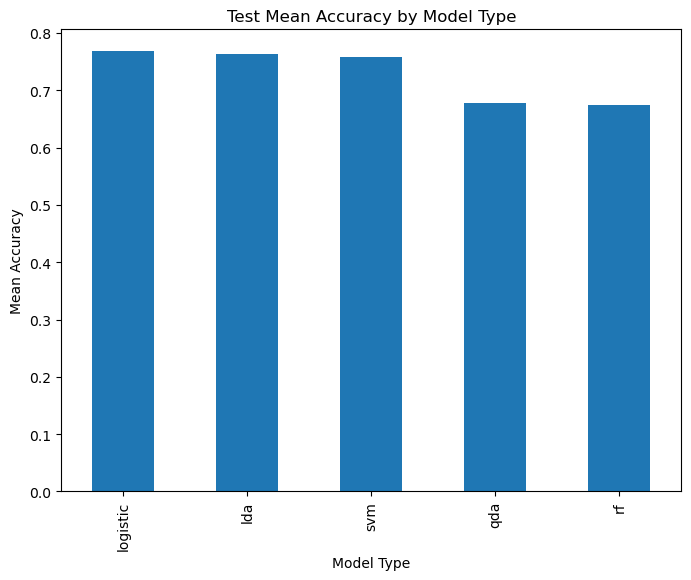

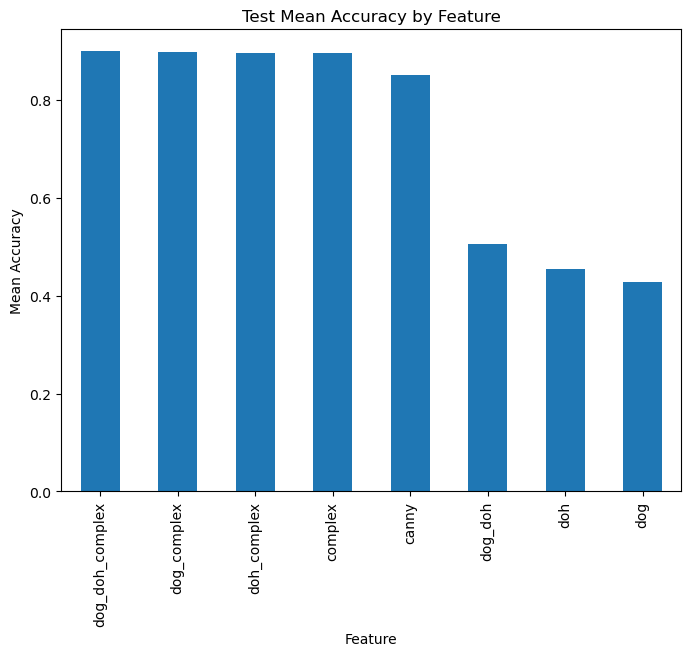

In [ ]:
grouped_views = ['model_type','feature']
grouped_values = ['accuracy_score','training_time','inference_time']

for view in grouped_views:
    for values in grouped_values:
        try:
            training_results_model_type = training_results.groupby(view)[values].mean()
            plt.figure(figsize=(8,6))
            training_results_model_type = training_results_model_type.sort_values(ascending=False)
            training_results_model_type.plot(kind='bar', figsize=(8, 6))
            plt.title('Train Mean Accuracy by: ' + str(view))
            plt.xlabel(str(view))
            plt.ylabel('Mean ' + str(values))
        except:
            continue
        try:
            testing_results_model_type = testing_results.groupby(view)[values].mean()
            plt.figure(figsize=(8,6))
            testing_results_model_type = testing_results_model_type.sort_values(ascending=False)
            testing_results_model_type.plot(kind='bar', figsize=(8, 6))
            plt.title('Test Mean Accuracy by: ' + str(view))
            plt.xlabel(str(view))
            plt.ylabel('Mean ' + str(values))
        except:
            continue
